COUPAGE DE L'ENTETE

In [30]:

import numpy as np 
import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
for dirname, _, filenames in os.walk('C:\\Users\\HP\\ECOMMERCES\\CORRECTEUR QCM\\PREPARATION DE MON IMAGE\\Mr Cisse_page-0002.jpg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Decoupage de l'entete

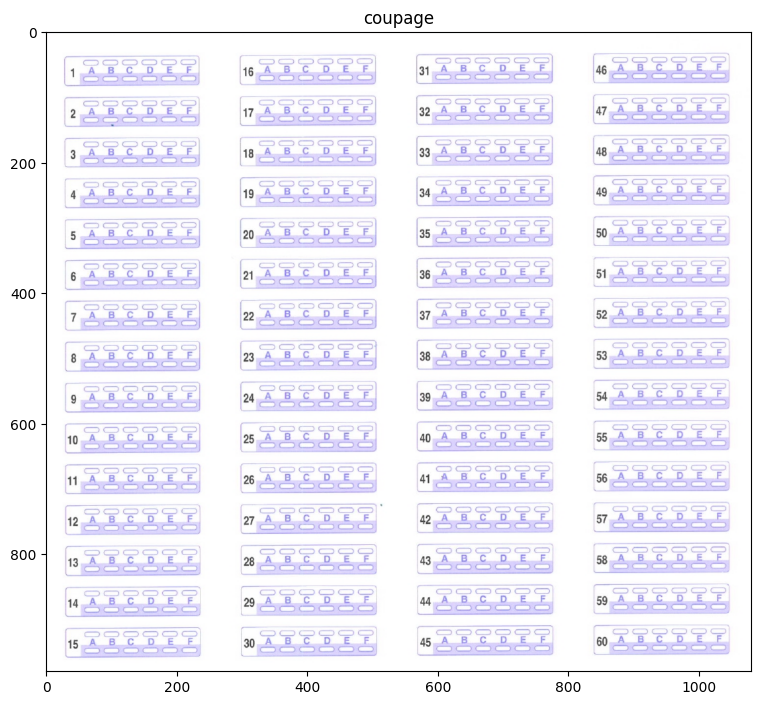

In [31]:


# Charger l'image
image_path = 'C:\\Users\\HP\\ECOMMERCES\\CORRECTEUR QCM\\correcteur QCM\\PREPARATION DE MON IMAGE\\Mr Cisse_page-0002.jpg'  # Remplacez par le chemin de votre image
image = cv2.imread(image_path)

# Définir la position de la ligne horizontale où l'on souhaite découper l'en-tête
# Exemple : position_y = 100 (découpe après 100 pixels de haut)
position_y = 670  # Ajustez cette valeur selon la position de votre ligne horizontale
position_x = 1150
position_gauche = 70
position_bas = 980

# Découper l'image en deux parties : avant et après la ligne horizontale
#header = image[:position_y, :]  # Partie supérieure (en-tête)
remaining_image = image[position_y:, :]
vertical = remaining_image[:, :position_x] 
vertical = vertical[:, position_gauche:] 
vertical = vertical[:position_bas, :] 
#vertical_image = image[position_x:, :] 



cv2.imwrite('C:/Users/HP/ECOMMERCES/CORRECTEUR QCM/correcteur QCM/PREPARATION DE MON IMAGE/coupage.jpg', vertical)


plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("coupage")
plt.imshow(vertical)





# PREPARATION IMAGE

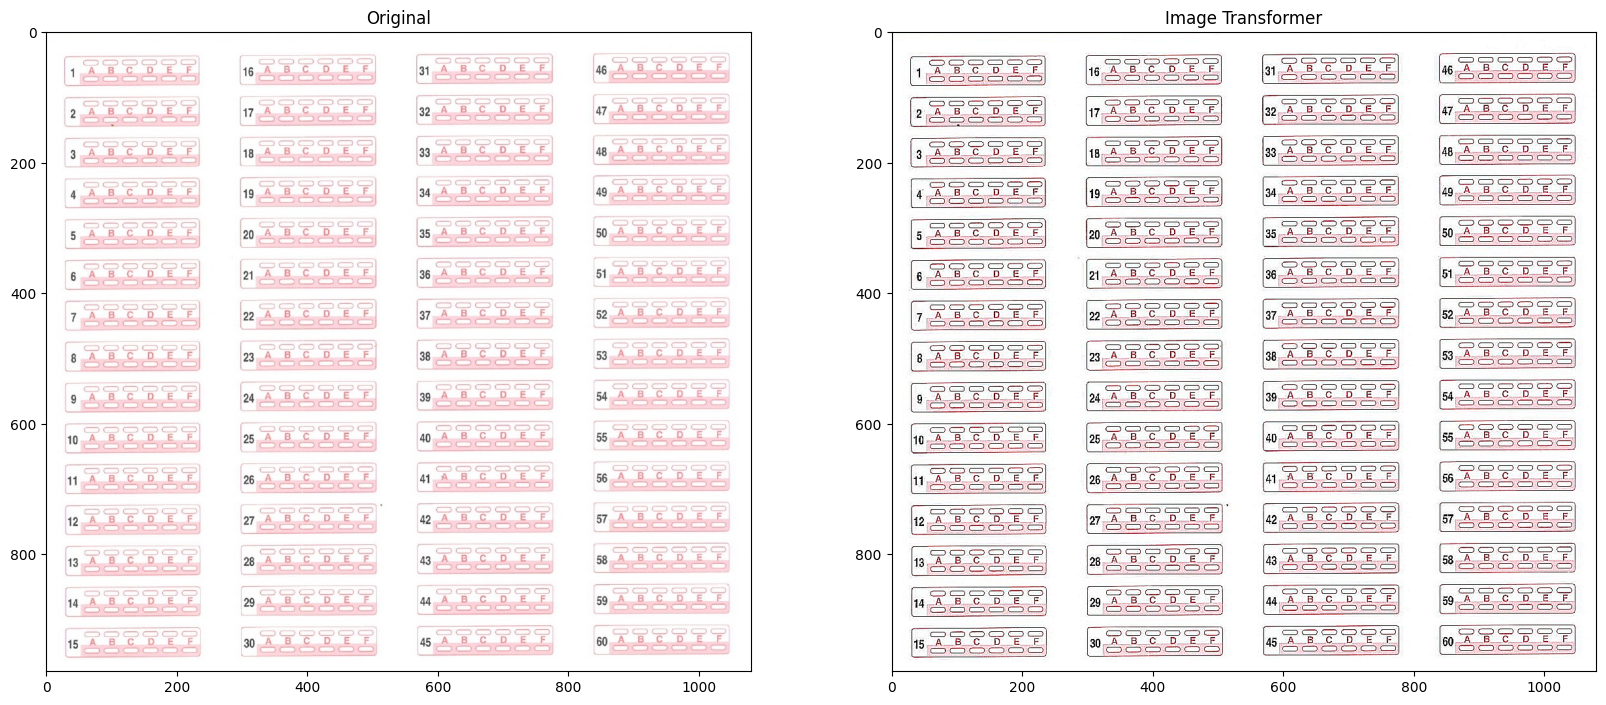

True

In [32]:
image = cv2.imread('C:/Users/HP/ECOMMERCES/CORRECTEUR QCM/correcteur QCM/PREPARATION DE MON IMAGE/coupage.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)


# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)


plt.subplot(1, 2, 2)
plt.title("Image Transformer")
plt.imshow(sharpened)
plt.show()
cv2.imwrite('Preparation.jpg',sharpened)

# 3eme Methode de Preparation

True

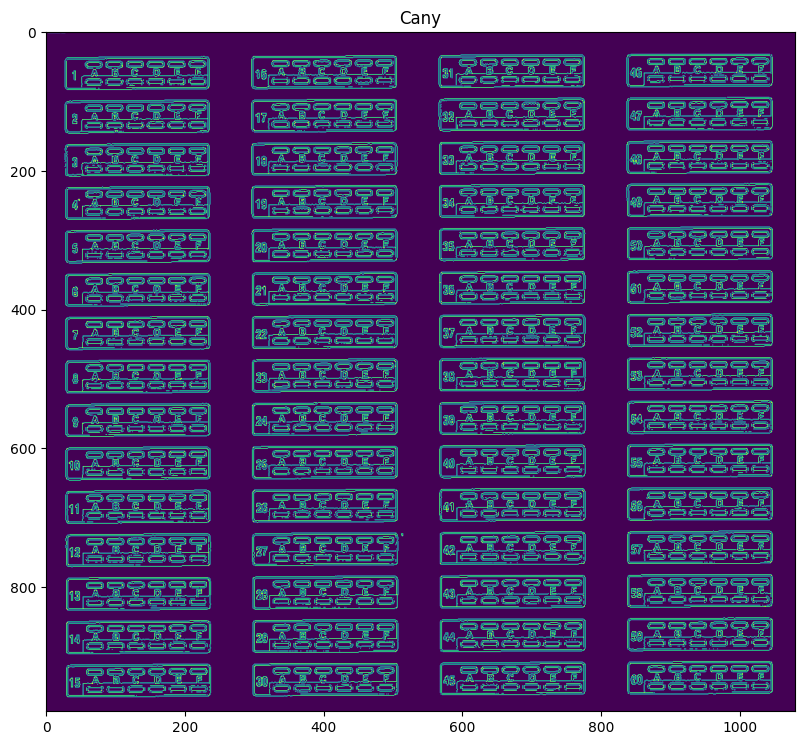

In [36]:
image = cv2.imread('C:/Users/HP/ECOMMERCES/CORRECTEUR QCM/correcteur QCM/PREPARATION DE MON IMAGE/coupage.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width,_ = image.shape
canny = cv2.Canny(image, 50, 120)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 6)
plt.title("Cany")
plt.imshow(canny)
cv2.imwrite('Cany.jpg',sharpened)


Une fonction qui permet de decouper tout les rectangle d'une image

In [17]:
import cv2

def decouper_rectangles(image_path):
    # Charger l'image
    image = cv2.imread(image_path)
    
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Appliquer un flou pour réduire le bruit
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Appliquer la détection de contours (Canny ou autre)
    edges = cv2.Canny(blurred, 50, 150)
    
    # Trouver les contours dans l'image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Créer une liste pour stocker les rectangles découpés
    rectangles = []
    
    for contour in contours:
        # Approximer les contours pour obtenir des rectangles
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        
        # Si le contour a 4 sommets, on suppose qu'il s'agit d'un rectangle
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            rectangle = image[y:y+h, x:x+w]
            rectangles.append(rectangle)
            
            # Optionnel: Dessiner le rectangle détecté sur l'image d'origine
            #cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 4)
    
    # Afficher l'image avec les rectangles détectés
    cv2.imshow('Rectangles', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite('rectangle.jpg',image)
    
    return rectangles

# Exemple d'utilisation
rectangles = decouper_rectangles('C:/Users/HP/ECOMMERCES/CORRECTEUR QCM/correcteur QCM/PREPARATION DE MON IMAGE/Cany.jpg')

# Enregistrer les rectangles découpés
for i, rect in enumerate(rectangles):
    cv2.imwrite(f'rectangle_{i}.jpg', rect)
    


In [102]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans

# Charger l'image
image = cv2.imread('C:/Users/HP/ECOMMERCES/CORRECTEUR QCM/correcteur QCM/PREPARATION DE MON IMAGE/Cany.jpg')

# Convertir en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage pour binariser l'image
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

# Trouver les contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extraire les tailles (largeur, hauteur) des contours détectés
sizes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    sizes.append([w, h])

# Convertir en numpy array pour clustering
sizes = np.array(sizes)

# Appliquer le clustering (K-means) pour identifier les groupes de tailles similaires
kmeans = KMeans(n_clusters=2, random_state=0).fit(sizes)

# Déterminer quel cluster correspond aux petites cases (on suppose qu'elles sont plus petites)
cluster_labels = kmeans.labels_
small_cluster_index = np.argmin(kmeans.cluster_centers_.sum(axis=1))

# Créer un répertoire pour sauvegarder les cases
output_dir = "case_detecter"
os.makedirs(output_dir, exist_ok=True)

# Compteur pour nommer les fichiers
counter = 1

# Colorier les objets détectés sur l'image originale
for i, contour in enumerate(contours):
    if cluster_labels[i] == small_cluster_index:
        x, y, w, h = cv2.boundingRect(contour)

        # Ajouter la condition supplémentaire pour filtrer les rectangles
        if 20 <= w <= 28 and 7 <= h <= 9:
            # Dessiner un rectangle autour des objets détectés
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)  # Couleur verte et épaisseur 2

            # Extraire et sauvegarder l'image
            roi = image[y:y+h, x:x+w]
            filename = os.path.join(output_dir, f"case_{counter}.png")
            cv2.imwrite(filename, roi)
            counter += 1

# Sauvegarder l'image avec les contours colorés
cv2.imwrite(os.path.join(output_dir, "image_coloree.png"), image)

print(f"{counter-1} cases sauvegardées dans le dossier {output_dir}.")
print(f"Image colorée sauvegardée dans le dossier {output_dir}.")


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


671 cases sauvegardées dans le dossier case_detecter.
Image colorée sauvegardée dans le dossier case_detecter.
